# **Evaluating Classification Models**

### **Evaluation Metrics & Confusion Matrix**  

#### **1. Evaluation Metrics**  
Evaluation metrics are used to **assess the performance** of a model, particularly in classification, regression, and clustering tasks.  

#### **For Classification Models:**  
- **Accuracy** = (TP + TN) / (TP + TN + FP + FN)  
- **Precision** = TP / (TP + FP) → How many predicted positives are actually correct?  
- **Recall (Sensitivity, TPR)** = TP / (TP + FN) → How many actual positives were correctly predicted?  
- **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall) → Balance between Precision & Recall  
- **ROC-AUC Score** → Measures how well the model separates classes  

#### **For Regression Models:**  
- **Mean Squared Error (MSE)** → Penalizes large errors  
- **Root Mean Squared Error (RMSE)** → More interpretable than MSE  
- **Mean Absolute Error (MAE)** → Measures absolute differences  
- **R² Score** → Measures how well the model fits the data  

#### **For Clustering Models:**  
- **Silhouette Score** → Measures how well points are assigned to clusters  
- **Davies-Bouldin Index** → Measures cluster separation and compactness  
- **Adjusted Rand Index (ARI)** → Compares predicted and true cluster labels  

---

### **2. Confusion Matrix**  
A confusion matrix is a table used to evaluate the performance of a classification model by comparing **actual** vs. **predicted** labels.  

|   | Predicted Positive | Predicted Negative |  
|---|------------------|------------------|  
| **Actual Positive** | TP (True Positive) | FN (False Negative) |  
| **Actual Negative** | FP (False Positive) | TN (True Negative) |  

- **True Positive (TP):** Correctly predicted positive cases  
- **True Negative (TN):** Correctly predicted negative cases  
- **False Positive (FP):** Incorrectly predicted positive (Type I Error)  
- **False Negative (FN):** Incorrectly predicted negative (Type II Error)  

#### **Example: Medical Diagnosis (Cancer Detection)**  
- **TP** → Model correctly predicts "cancer" when the patient has cancer  
- **TN** → Model correctly predicts "no cancer" when the patient is healthy  
- **FP (False Alarm)** → Model predicts "cancer" for a healthy patient  
- **FN (Missed Diagnosis)** → Model predicts "no cancer" when the patient actually has cancer 

### Objectives

- Implement and evaluate the performance of classification models on real-world data
- Interpret and compare various evaluation metrics and the confusion matrix for each model

## Introduction

- Use the breast cancer data set included in scikit-learn to predict whether a tumor is benign or malignant
- Create two classification models and evaluate them.
- Add some Gaussian random noise to the features to simulate measurement errors


Interpreting and comparing the various evaluation metrics and the confusion matrix for each model will provide us with some valuable intuition regarding what the evaluation metrics mean and how they might impact our interpretation of the model performances.

Our goal in this project is not to find the best classifier - it is primarily intended for us to practice interpreting and comparing results in the context of a real-world problem.

In [3]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data = load_breast_cancer()
X, y = data.data, data.target #X contains the input feature, y contains the target label (0 = maligant, 1 = benign)
labels = data.target_names #labels contain the class name ('maligant', 'benign')
feature_names = data.feature_names #feature_names contain the names of the features in the dataset.

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In summary, each observation in the data set consists of a variety attributes measured from a sample of cells from a suspicious mass taken from a patient. The goal is to predict whether a mass is malignant (positive case) or benign (negative case):

In [12]:
#standardize the dasta
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Add some noise

Next, add some noise to simulate random measurement error, then view the first few rows of the original and noisy features for comparison.

### Gaussian Noise
Gaussian noise is **random noise** that follows a **normal (Gaussian) distribution**. It is commonly found in real-world data, especially in **signal processing, images, and statistical models**.

### Characteristics of Gaussian Noise
- **Follows a Normal Distribution**: The noise values are distributed around a **mean (μ)** with a certain **standard deviation (σ)**.
- **Defined by Two Parameters**:
  - Mean (μ): The average value of the noise (often 0).
  - Standard Deviation (σ): Controls how much variation (spread) the noise has.
- **Adds Random Distortions**: It introduces small, random variations in data.

### Mathematical Representation
If \( N \) is Gaussian noise:
\[
N \sim \mathcal{N}(\mu, \sigma^2)
\]
where:
- \( \mu \) = Mean (center of the distribution).
- \( \sigma^2 \) = Variance (spread of the noise).


Usage in Machine Learning & Image Processing:
- Used in **data augmentation** (e.g., making models more robust).
- Helps in **denoising autoencoders**.
- Simulates **real-world noise in datasets**.


In [13]:
#ADD GAUSSIAN NOISE TO THE DATA SET
np.random.seed(42) #for reproducibility
noise_factor = 0.5 #adjust this accordingly top control the amount of noise
X_noisy = X_scaled + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X.shape)

#load the original and noisy data sets into a dataframe for comparison and visulaizaton
df1 = pd.DataFrame(X_scaled, columns = feature_names)
df_noisy = pd.DataFrame(X_noisy, columns = feature_names)

In [14]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
df_noisy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


### Visualizing the noise content. 
We can get a good idea of how much noise there is in the features by comparing values in the above tables. We can also visualize the differences in several ways.
Let's begin by plotting the histograms of one of the features with and without noise for comparison.
#### Histograms

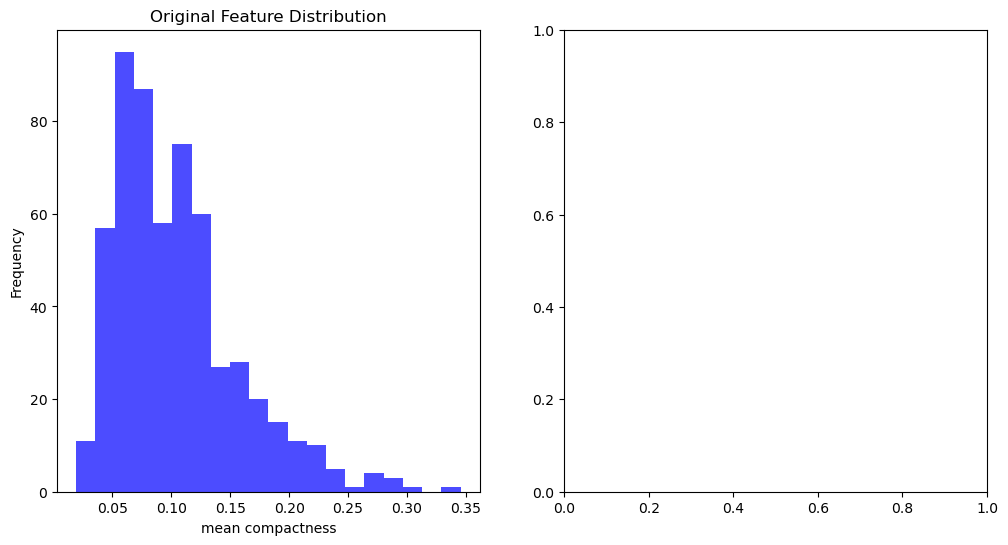

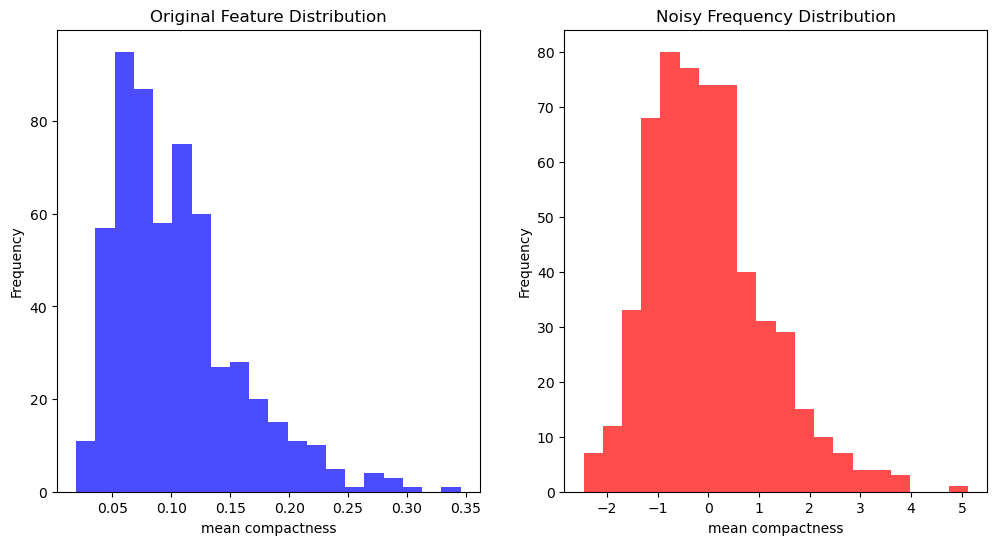

In [18]:
plt.figure(figsize = (12,6))

#original feature distribution (noise free)
plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins = 20, alpha = 0.7, color = 'blue', label = 'Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

#noisy feature distribution
plt.subplot(1, 2, 2)
plt.hist(df_noisy[feature_names[5]], bins = 20, alpha = 0.7, color ='red', label = 'noisy')
plt.title('Noisy Frequency Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

plt.tight_layout #ensures tight layout between plots
plt.show()


The noise-free histogram is skewed to the left and appears to a log-normal distribution, while the noisy histogram is less skewed, tending toward a normal distribution.

**Plots**

We can also plot the two features together to get a sense of their differences.

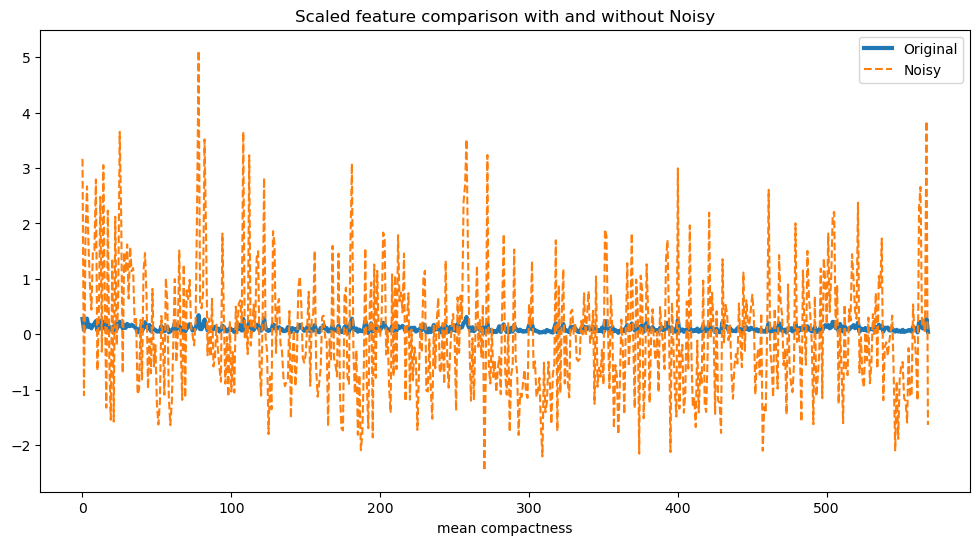

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df[feature_names[5]], label = 'Original', lw = 3)
plt.plot(df_noisy[feature_names[5]], '--', label = 'Noisy')
plt.title('Scaled feature comparison with and without Noisy')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout
plt.show()

<Figure size 1200x600 with 0 Axes>

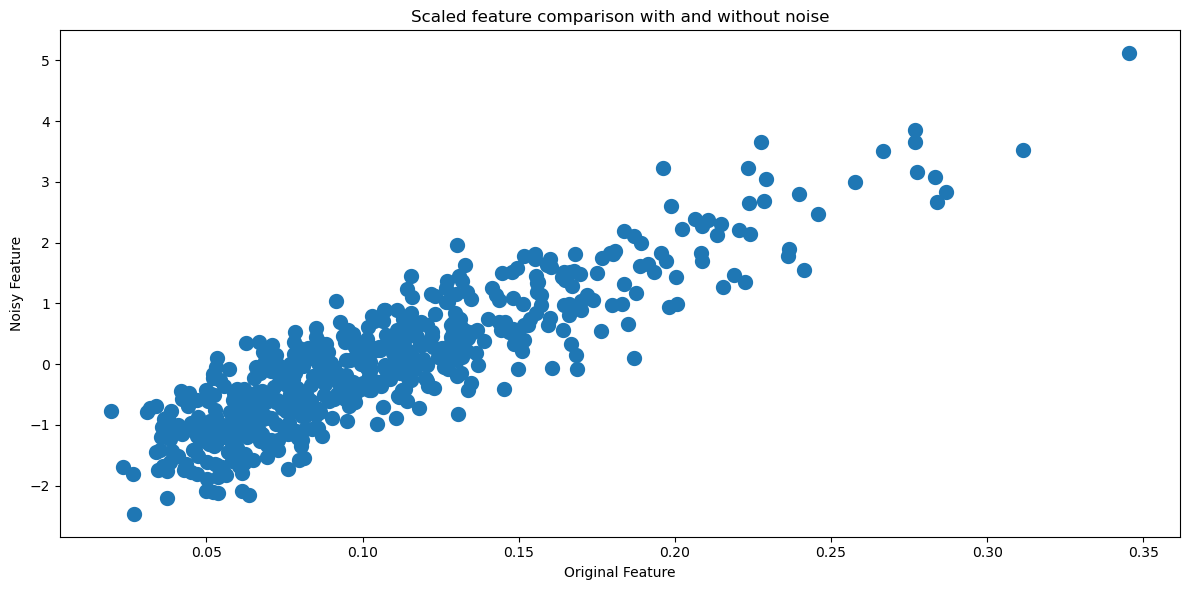

In [22]:
#now let's plot the scatter plot and compare 
plt.figure(figsize = (12,6))
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]], lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

In [23]:
# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

# Fit the models to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [24]:
#Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [25]:
#Print the accuracy scores and classification reports for both models
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



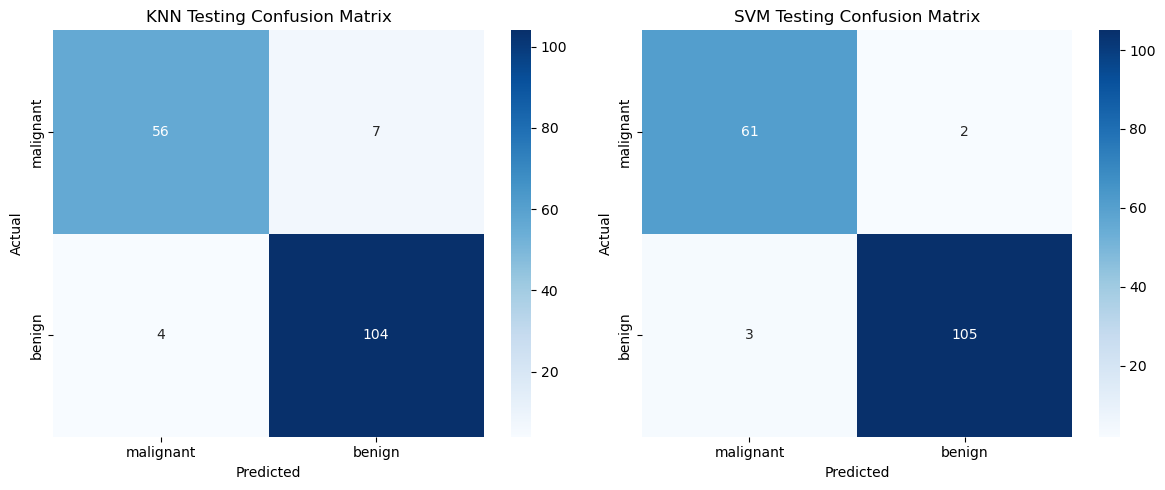

In [26]:
#Plot the confusion matrices
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**What is the worst kind of prediction error in this context?**

It would indeed be very unpleasant to be told you have cancer, when in fact you don't. But the consequences of being told you don't have cancer when you actually do are life threatening. State this worse-case scenario in terms of true/false positive/negative diagnoses, and identify their counts from the confusion matrices.

In medical diagnosis, a **positive test** for malignancy means that a mass is identified as **malignant (cancerous)**, while a **negative test** means the mass is **benign (non-cancerous)**.  

The worst-case scenario in this situation is a **false negative**, where the test incorrectly predicts that a malignant mass is benign. This is dangerous because a patient with cancer might not receive the necessary treatment.  

In our models:  
- The **K-Nearest Neighbors (KNN) model** incorrectly predicted **7 malignant cases** as benign (false negatives = 7).  
- The **Support Vector Machine (SVM) model** only made **2 such mistakes** (false negatives = 2).  

Since the SVM model has fewer false negatives, it is **more sensitive** in detecting malignant cases than the KNN model. This means the SVM model is **better at identifying cancer correctly**, reducing the risk of missing a true positive case.

**What can you say to compare the overall performances of the two models?**

SVM outperformed KNN in terms of precision, recall, and F1-score for both for the individual classes and their overall averages. This indicates that SVM is a stronger classifier. Although KNN performed quite well with an accuracy of 94%, SVM has better ability to correctly classify both malignant and beinign cases, with fewer errors. Given that the goal would be to choose the model with better generalization and fewer false negatives, SVM is certainly the preferred classifier.

### Are we overfitting?
Let's evaluate the results on the training data and compare them against the test data results.

In [27]:
#Obtain the prediction results using the training data.
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [28]:
# Evaluate the models on the training data
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.955
SVM Training Accuracy: 0.972

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



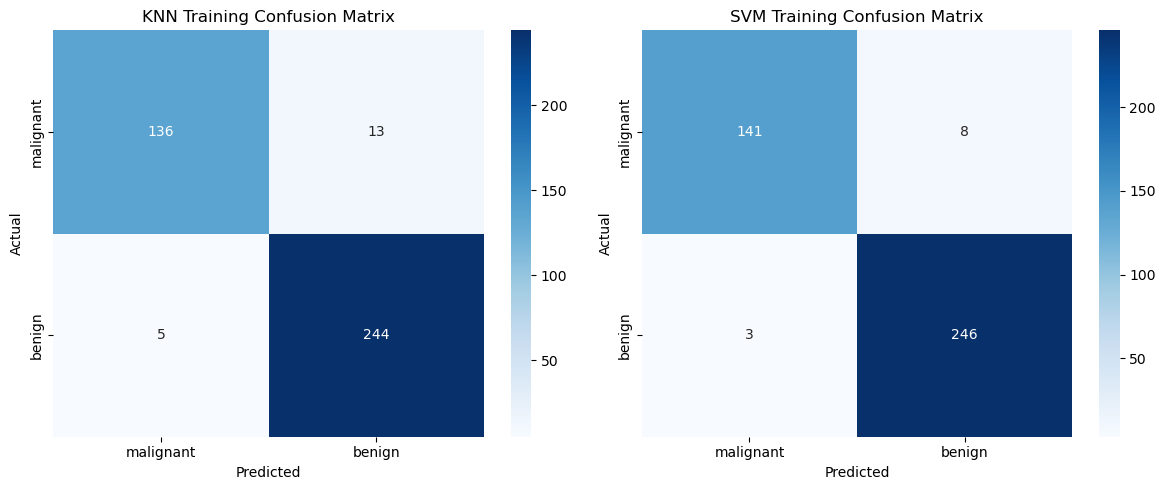

In [29]:
#Plot the confusion matrices for the training data
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Comparing training and testing accuracies for both models
What can you say about the accuracy of the two models on the training and test data sets?

What do these results possibly indicate?

Ideally the accuracy of a model would be almost the same on the training and testing data sets.

It would be unusual for the accuracy to be higher on the test set and this might occur due to chance or some sort of data leakage. For example, here we have normalized all of the data rather than fitting StandardScaler to the training data and only then applying it to the train and test sets separately. We'll revisit this and other pitfalls in another lab. 

When the accuracy is substantially higher on the training data than on the testing data, the model is likely memorizing details in the training data that don't generalize to the unseen data - the model is overfitting to the training data.


| Model | Phase |  Accuracy |
| ------------  | -------- | --------- |
| KNN  | Train  | 95.5% |
| KNN  | Test   | 93.6% |
| SVM  | Train  | 97.2% |
| SVM  | Test   | 97.1% |

For the SVM model, the training and testing accuracies are essentially the same at about 97%. This is ideal - the SVM model is likely not overfit.
For the KNN model, however, the training accuracy is about 2% higher that the test accuracy, indicating there might be some overfitting.

In summary, the SVM model is both more convincing and has a higher accuracy than the KNN model. 
Remember, we aren't trying to tune these models; we are just comparing their performance with a fixed set of hyperparamters.
